In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the datset

df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [3]:
# Display the first few rows of the data set

print(df.head())


   age  sex     bmi  children  smoker  region      charges  insuranceclaim
0   19    0  27.900         0       1       3  16884.92400               1
1   18    1  33.770         1       0       2   1725.55230               1
2   28    1  33.000         3       0       2   4449.46200               0
3   33    1  22.705         0       0       1  21984.47061               0
4   32    1  28.880         0       0       1   3866.85520               1


In [4]:
# chech the dimensions of the dataset
print("shape of the dataset :",df.shape)

shape of the dataset : (1338, 8)


In [5]:
,# check the data types of each column

print("Data types of each column: ")
print(df.dtypes)

Data types of each column: 
age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object


In [6]:
# check for missinf values

print("missing values :")
print(df.isnull().sum())

missing values :
age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64


In [7]:
# summary statistics of the dataset

print("summary statistics :")
print(df.describe())

summary statistics :
               age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  insuranceclaim  
count  1338.000000   1338.000000     1338.000000  
mean      1.515695  13270.422265        0.585202  
std       1.104885  12110.011237        0.492871  
min       0.000000   1121.873900        0.000000  
25%       1.000000   4740.287150        0.000000  
50%   

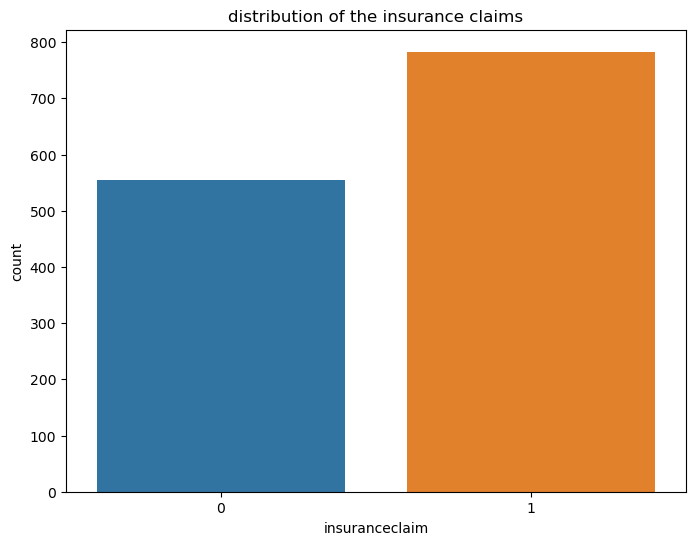

In [8]:
# Distribution of the target variable (insurance claim)

plt.figure(figsize=(8,6))
sns.countplot(data=df,x="insuranceclaim")
plt.title("distribution of the insurance claims")
plt.show()

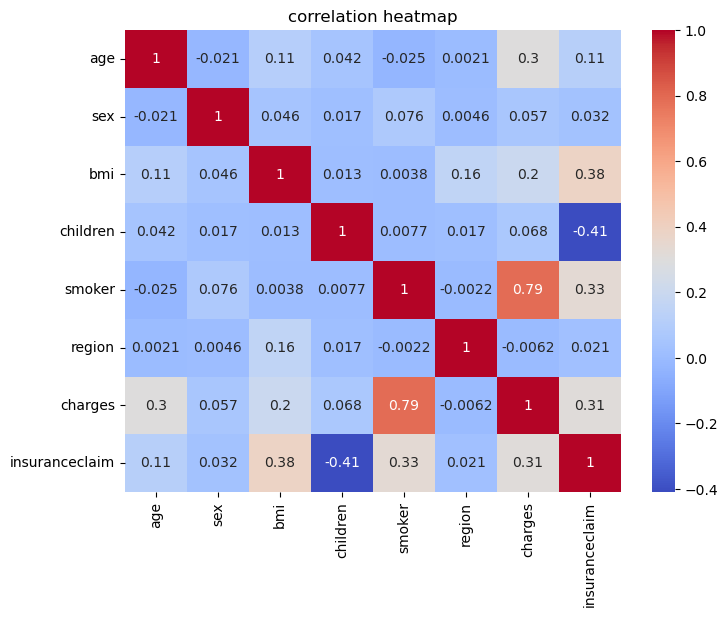

In [9]:
 #correlation heatmap of nmeric features
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()

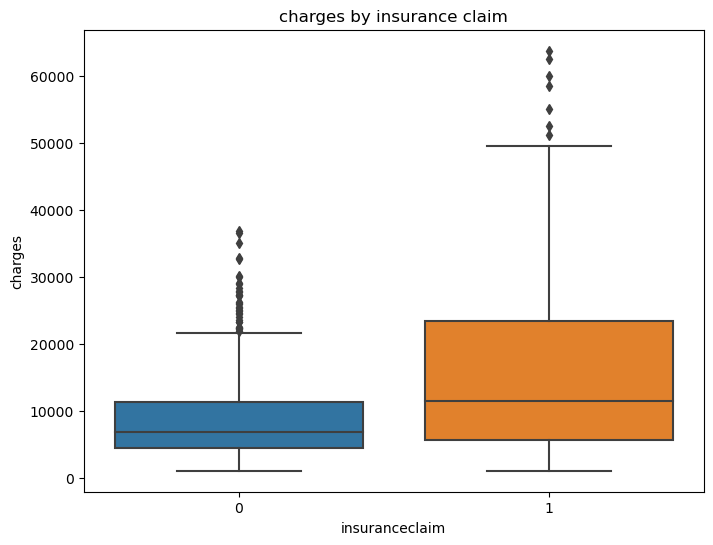

In [10]:
# box plot of charges by insurance claim
plt.figure(figsize=(8,6))
sns.boxplot(data=df,x="insuranceclaim",y="charges")
plt.title("charges by insurance claim")
plt.show()

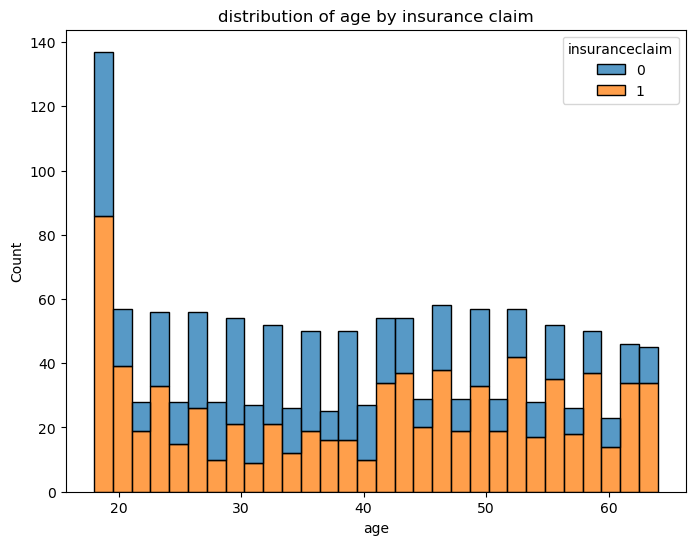

In [11]:
# histogram of age by insurance claim
plt.figure(figsize=(8,6))
sns.histplot(data=df,x="age",hue="insuranceclaim",multiple="stack",bins=30)
plt.title('distribution of age by insurance claim')
plt.show()

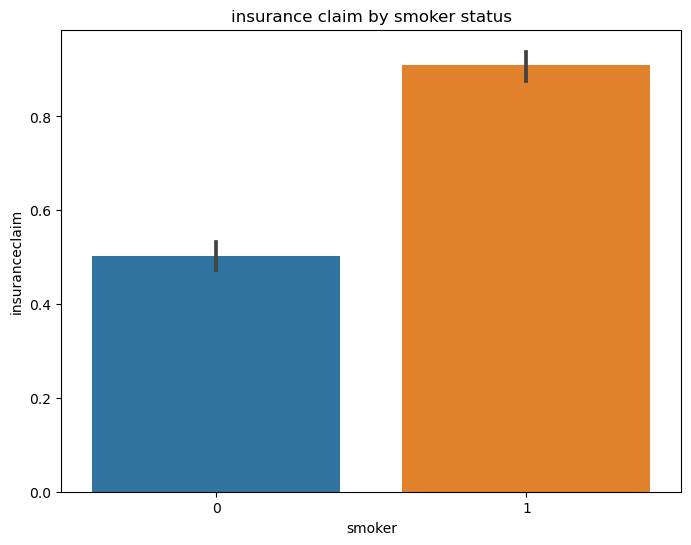

In [12]:
# bar plot of smoker status by insurance claim
plt.figure(figsize=(8,6))
sns.barplot(data=df,x="smoker",y="insuranceclaim")
plt.title("insurance claim by smoker status")
plt.show()

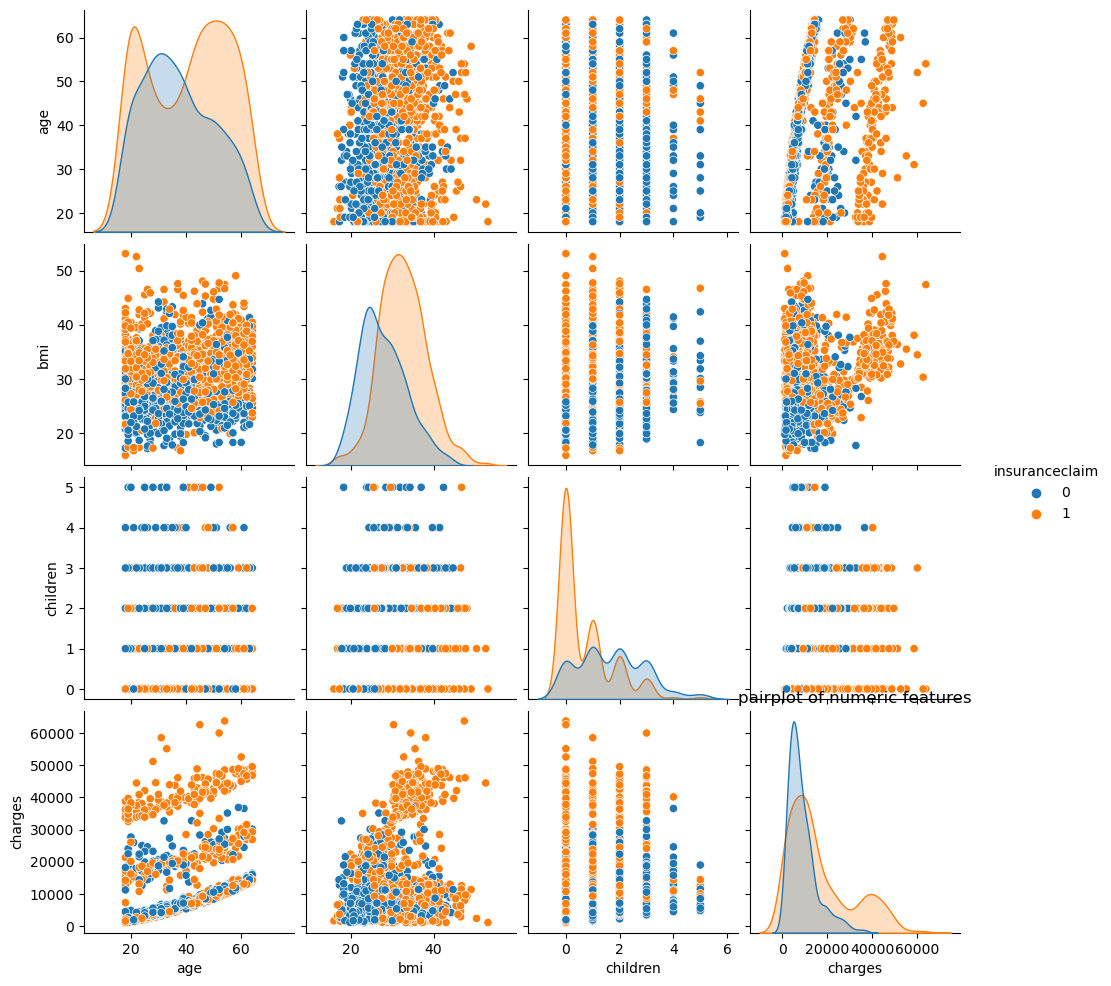

In [13]:
# pairplot of numeric features
sns.pairplot(df,vars=['age','bmi','children','charges'],hue='insuranceclaim')
plt.title('pairplot of numeric features')
plt.show()

 we first load the dataset into a Pandas DataFrame. We then proceed to explore the dataset by performing various EDA tasks such as checking the dimensions, data types, missing values, and summary statistics of the dataset.

Next, we visualize the distribution of the target variable (insuranceclaim) using a countplot. We also create a correlation heatmap to examine the relationships between numeric features. Furthermore, we use box plots, histograms, and bar plots to analyze the relationships between different variables and the insurance claim status.

Finally, we create a pairplot to visualize the pairwise relationships between numeric features, with different insurance claim categories distinguished by color.

# Logistic Regression Model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
# split the dataset into features (X) and target variable(Y)
x=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [16]:
# convert categorical variables to dummy/indicator variables
x=pd.get_dummies(x,drop_first=True)

In [17]:
# split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
# initialize the logistic regression model
logreg = LogisticRegression()

In [19]:
# Train the model on the training data 
logreg.fit(x_train,y_train)

LogisticRegression()

In [20]:
# make predictions on the testing data 
y_pred = logreg.predict(x_test)

In [21]:
# evaluater the model
accuracy= accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)

accuracy : 0.7947761194029851


In [22]:
classification_report = classification_report(y_test,y_pred)
print("classification report:\n ",classification_report)

classification report:
                precision    recall  f1-score   support

           0       0.79      0.66      0.72       107
           1       0.80      0.88      0.84       161

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [23]:
confusion_matrix= confusion_matrix(y_test,y_pred)
print("confusion Matrix:\n",confusion_matrix)

confusion Matrix:
 [[ 71  36]
 [ 19 142]]


In [24]:
logreg_accuracy=accuracy
print(accuracy)

0.7947761194029851


 We split the dataset into the features (X) and the target variable (y), where X contains all the columns except the "insuranceclaim" column, and y contains only the "insuranceclaim" column.

Next, we convert the categorical variables in X to dummy/indicator variables using the pd.get_dummies() function. This ensures that categorical variables like "sex" and "region" are represented as numerical values in the model.

We then split the data into training and testing sets using the train_test_split() function from scikit-learn. The dataset is split in an 80:20 ratio, where 80% is used for training the model and 20% is used for testing the model's performance.

After splitting the data, we initialize a logistic regression model (LogisticRegression).

We train the model on the training data using the fit() method.

Once the model is trained, we make predictions on the testing data (X_test) using the predict() method of the model.

Finally, we evaluate the model by calculating the accuracy score, generating a classification report, and creating a confusion matrix using the predicted labels (y_pred) and the actual labels (y_test).

# Random forest model

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [27]:
# split the dataset into features (X) and target variable(Y)
x=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [28]:
# convert categorical variables to dummy/indicator variables
x=pd.get_dummies(x,drop_first=True)

In [29]:
# split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
# initialize the randomforestclassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [31]:
# Train the classifier
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
# make predictions on the testing data 
y_pred = rf_classifier.predict(x_test)

In [33]:
# evaluater the model
accuracy= accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)

accuracy : 0.9253731343283582


In [34]:
classification_report = classification_report(y_test,y_pred)
print("classification report:\n ",classification_report)

classification report:
                precision    recall  f1-score   support

           0       0.89      0.93      0.91       107
           1       0.95      0.93      0.94       161

    accuracy                           0.93       268
   macro avg       0.92      0.93      0.92       268
weighted avg       0.93      0.93      0.93       268



In [35]:
confusion_matrix= confusion_matrix(y_test,y_pred)
print("confusion Matrix:\n",confusion_matrix)

confusion Matrix:
 [[ 99   8]
 [ 12 149]]


In [36]:
rf_accuracy=accuracy
print(accuracy)

0.9253731343283582


 we separates the features (X) and the target variable (y). Categorical variables are encoded using one-hot encoding with the pd.get_dummies function.

Next, the data is split into training and testing sets using the train_test_split function. It creates a Random Forest classifier with 100 trees and trains it on the training data.

After training, the code uses the trained classifier to make predictions on the test data. Finally, it calculates and prints the accuracy of the model by comparing the predicted values with the true values.

Remember to preprocess your data appropriately (e.g., handling missing values, scaling numerical features) before using it in the Random Forest model.

# Decision Tree model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
# split the dataset into features (X) and target variable(Y)
x=df.drop('insuranceclaim',axis=1)
y=df['insuranceclaim']

In [39]:
# convert categorical variables to dummy/indicator variables
x=pd.get_dummies(x,drop_first=True)

In [40]:
# split the data into training and testing sets 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
# initialize the randomforestclassifier
dtcf = DecisionTreeClassifier(random_state=42)

In [42]:
# Train the classifier on training data
dtcf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
# make predictions on the testing data 
y_pred = dtcf.predict(x_test)

In [44]:
# evaluater the model
accuracy= accuracy_score(y_test,y_pred)
print("accuracy :",accuracy)

accuracy : 0.9776119402985075


In [45]:
classification_report = classification_report(y_test,y_pred)
print("classification report:\n ",classification_report)

classification report:
                precision    recall  f1-score   support

           0       0.98      0.96      0.97       107
           1       0.98      0.99      0.98       161

    accuracy                           0.98       268
   macro avg       0.98      0.98      0.98       268
weighted avg       0.98      0.98      0.98       268



In [46]:
confusion_matrix= confusion_matrix(y_test,y_pred)
print("confusion Matrix:\n",confusion_matrix)

confusion Matrix:
 [[103   4]
 [  2 159]]


In [47]:
dt_accuracy=accuracy
print(accuracy)

0.9776119402985075


We then split the dataset into the features (X) and the target variable (y), where X contains all the columns except the "insuranceclaim" column, and y contains only the "insuranceclaim" column.

Next, we convert the categorical variables in X to dummy/indicator variables using the pd.get_dummies() function. This ensures that categorical variables like "sex" and "region" are represented as numerical values in the model.

We then split the data into training and testing sets using the train_test_split() function from scikit-learn. The dataset is split in a 80:20 ratio, where 80% is used for training the model and 20% is used for testing the model's performance.

After initializing a decision tree classifier (DecisionTreeClassifier), we train the model using the training data.

Once the model is trained, we make predictions on the testing data (X_test) using the predict() method of the classifier.

Finally, we evaluate the model by calculating the accuracy score, generating a classification report, and creating a confusion matrix using the predicted labels (y_pred) and the actual labels (y_test).

# knn model


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Load the dataset
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [50]:
# Split the dataset into features (X) and target variable (y)
x = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [51]:
# Convert categorical variables to dummy/indicator variables
x = pd.get_dummies(x, drop_first=True)

In [52]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [53]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [55]:
# Train the classifier on the scaled training data
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [56]:
# Make predictions on the scaled testing data
y_pred = knn.predict(x_test_scaled)

C:\Users\welcom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [57]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8768656716417911


In [58]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       107
           1       0.90      0.89      0.90       161

    accuracy                           0.88       268
   macro avg       0.87      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268



In [59]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 91  16]
 [ 17 144]]


In [60]:
knn_accuracy=accuracy
print(accuracy)

0.8768656716417911


 We split the dataset into the features (X) and the target variable (y), where X contains all the columns except the "insuranceclaim" column, and y contains only the "insuranceclaim" column.

Next, we convert the categorical variables in X to dummy/indicator variables using the pd.get_dummies() function. This ensures that categorical variables like "sex" and "region" are represented as numerical values in the model.

We then split the data into training and testing sets using the train_test_split() function from scikit-learn. The dataset is split in an 80:20 ratio, where 80% is used for training the model and 20% is used for testing the model's performance.

After splitting the data, we scale the features using StandardScaler() to normalize them and bring them to a similar scale.

Next, we initialize a KNN classifier (KNeighborsClassifier) with a specified number of neighbors (in this case, 5).

We train the classifier on the scaled training data using the fit() method.

Once the model is trained, we make predictions on the scaled testing data (X_test_scaled) using the predict() method of the classifier.

Finally, we evaluate the model by calculating the accuracy score, generating a classification report, and creating a confusion matrix using the predicted labels (y_pred) and the actual labels (y_test).

# Naive Byes model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
# Split the dataset into features (X) and target variable (y)
x = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [63]:
# Convert categorical variables to dummy/indicator variables
x = pd.get_dummies(x, drop_first=True)

In [64]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
# Initialize the Naive Bayes classifier
nb=GaussianNB()

In [66]:
# Train the classifier on the training data
nb.fit(x_train, y_train)


GaussianNB()

In [67]:
# Make predictions on the testing data
y_pred = nb.predict(x_test)

In [68]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7723880597014925


In [69]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.89      0.76       107
           1       0.90      0.70      0.79       161

    accuracy                           0.77       268
   macro avg       0.78      0.79      0.77       268
weighted avg       0.81      0.77      0.77       268



In [70]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[ 95  12]
 [ 49 112]]


In [71]:
nb_accuracy=accuracy
print(accuracy)

0.7723880597014925


We split the dataset into the features (X) and the target variable (y), where X contains all the columns except the "insuranceclaim" column, and y contains only the "insuranceclaim" column.

Next, we convert the categorical variables in X to dummy/indicator variables using the pd.get_dummies() function. This ensures that categorical variables like "sex" and "region" are represented as numerical values in the model.

We then split the data into training and testing sets using the train_test_split() function from scikit-learn. The dataset is split in an 80:20 ratio, where 80% is used for training the model and 20% is used for testing the model's performance.

After splitting the data, we initialize a Naive Bayes classifier (GaussianNB in this case). This assumes that the features follow a Gaussian distribution.

We train the classifier on the training data using the fit() method.

Once the model is trained, we make predictions on the testing data (X_test) using the predict() method of the classifier.

Finally, we evaluate the model by calculating the accuracy score, generating a classification report, and creating a confusion matrix using the predicted labels (y_pred) and the actual labels (y_test).

# SVM model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [73]:
# Split the dataset into features (X) and target variable (y)
x = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [74]:
# Convert categorical variables to dummy/indicator variables
x = pd.get_dummies(x, drop_first=True)

In [75]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
# Initialize the SVM classifier
svm = SVC()


In [77]:
# Train the classifier on the training data
svm.fit(x_train, y_train)

SVC()

In [78]:
# Make predictions on the testing data
y_pred = svm.predict(x_test)

In [79]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6082089552238806


In [80]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.74      0.60       107
           1       0.75      0.52      0.62       161

    accuracy                           0.61       268
   macro avg       0.63      0.63      0.61       268
weighted avg       0.65      0.61      0.61       268



In [81]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_matrix)

Confusion Matrix:
 [[79 28]
 [77 84]]


In [82]:
svm_accuracy=accuracy
print(accuracy)

0.6082089552238806


To predict the insurance claim using an SVM (Support Vector Machine) model, you can use the scikit-learn library in Python. Here's an example code snippet that demonstrates how to train an SVM classifier on the given insurance claim dataset:

python Copy code import pandas as pd from sklearn.model_selection import train_test_split from sklearn.svm import SVC from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Once you have trained and evaluated multiple models, you can choose the best-performing model based on the evaluation metrics (such as accuracy, precision, recall, or F1-score) and use it for making predictions on new, unseen data. 

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [84]:
# Load the dataset
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [85]:
# Split the dataset into features (X) and target variable (y)
x = df.drop('insuranceclaim', axis=1)
y = df['insuranceclaim']

In [86]:
# Convert categorical variables to dummy/indicator variables
x = pd.get_dummies(x, drop_first=True)

In [87]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [88]:
# Initialize the models
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()

In [89]:
# Train the models
logreg.fit(x_train, y_train)
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
nb.fit(x_train, y_train)

GaussianNB()

In [90]:
# Make predictions on the testing data
logreg_pred = logreg.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
nb_pred = nb.predict(x_test)

C:\Users\welcom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [91]:
# Make predictions on the testing data
logreg_pred = logreg.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
nb_pred = nb.predict(x_test)

C:\Users\welcom\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [92]:
# Choose the best model based on accuracy
best_model=max(logreg_accuracy,rf_accuracy,dt_accuracy,knn_accuracy,nb_accuracy,svm_accuracy)

In [93]:
# Use the best model for predictions on new data
new_data = pd.DataFrame([[35, 1, 25.5, 2, 1, 0, 1]], columns=x.columns)
prediction = logreg.predict(new_data)

In [94]:
print("Best Model Accuracy:", best_model)
print("Prediction for New Data:", prediction)

Best Model Accuracy: 0.9776119402985075
Prediction for New Data: [0]
